In [1]:
import cv2
import os
import numpy as np
import time
import math
import apriltag
import pyrealsense2 as rs
from realworld_func.class_motionhelper import tracker, timer
from utils_real import *
from utils_track import tps_trans, get_tps_mat

In [2]:
Hz = 50

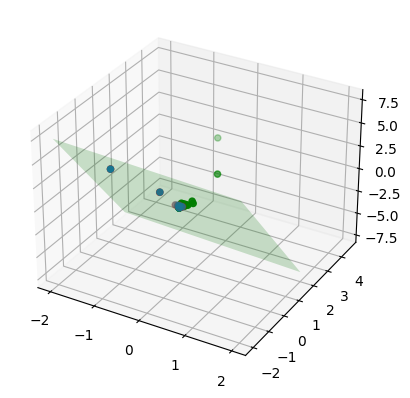

[[-3.20236832e-05  1.11983092e-04]
 [ 2.65628405e-05  1.57361155e-05]
 [-3.27085945e-06 -6.62184393e-05]
 [ 2.06701407e-06  3.04034938e-06]
 [ 2.67591167e-05 -1.42125617e-04]
 [-1.03336833e-05 -1.60552790e-05]
 [-3.17867830e-06  2.31486956e-05]
 [-2.15039449e-06  1.31575935e-05]
 [-2.77608115e-06  2.35571915e-05]
 [-3.81859854e-06  3.55007069e-05]
 [ 2.81890175e-06 -6.77910839e-06]
 [ 1.57711736e-06 -2.15291993e-06]
 [ 1.38719008e-06  1.58624096e-06]
 [-9.32550904e-07 -1.03219622e-06]
 [ 6.34989590e-07 -3.45255853e-06]
 [-3.32264176e-06  1.01061369e-05]
 [ 1.23094749e+00 -5.64572668e+00]
 [ 1.82392879e-03 -7.07253022e-03]
 [ 1.31982297e-03 -1.10784862e-02]]


In [3]:
tps_coef = get_tps_mat()
print(tps_coef)

In [6]:
publish_xy(tps_coef, Hz, 120, LOG_INFO = True, VERBOSE = True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [120.0sec].


[ERROR] [1665646763.786078]: Unable to immediately register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


[INFO] [1665646769.296046]: -0.0 -0.0 -1.5116936431843089
[INFO] [1665646769.871212]: -0.0 -0.0 -1.5116936431843089
[INFO] [1665646770.471864]: -0.0 -0.0 -1.5116936431843089
[INFO] [1665646770.949862]: -0.0 -0.0 -1.5116936431843089
[INFO] [1665646771.227819]: -0.0 -0.0 -1.5116936431843089
[INFO] [1665646771.495391]: 0.011270311863195825 0.003365177380876716 -1.5650821032756994
[INFO] [1665646771.579332]: 0.011814851175408592 0.0033730203603088427 -1.565049263631693
[INFO] [1665646771.662672]: 0.011814851175408592 0.0033730203603088427 -1.5707963267948966
[INFO] [1665646772.014015]: 0.009916891820099583 0.04876137714361306 -1.5337762109209665
[INFO] [1665646772.093543]: 0.013696687994285028 0.05561515946713769 -1.5237107359146762
[INFO] [1665646772.166570]: 0.016395209253745158 0.06416485577704734 -1.5297936793495692
[INFO] [1665646772.244274]: 0.02068115256411618 0.07032289401466585 -1.5253730473733196
[INFO] [1665646772.315244]: 0.02808878874961085 0.06898271574825543 -1.5358106079663

/tmp/pip-install-wo1xhjiz/apriltag/core/contrib/apriltag_quad_contour.c:467: warning: count < 8 :(


[INFO] [1665646832.621873]: 0.029370448930397863 0.0008754279830434086 -1.5515679276951895
[INFO] [1665646832.989746]: 0.019843096542773164 0.009133599858113683 -1.5289046816989678
[INFO] [1665646833.073315]: 0.023625841173212425 0.01007256456897565 -1.5348836301803326
[INFO] [1665646833.155582]: 0.025981245752071835 0.010312246205161912 -1.5406849487818142
[INFO] [1665646834.223418]: 0.003198962662557925 0.04330254702344227 -1.428024381775286
[INFO] [1665646834.305531]: 0.004422273717056502 0.040671823460661116 -1.409704422257316
[INFO] [1665646834.385465]: 0.0019567139334562 0.04128044590938629 -1.3892724499368059
[INFO] [1665646834.476032]: -9.854181068291723e-05 0.03835289146254617 -1.3843094251276797
[INFO] [1665646834.562651]: -0.0021202743196901963 0.028415783206499512 -1.3805776772124372
[INFO] [1665646834.648748]: -0.0028335046266394492 0.019119276190364687 -1.3686275335063398
[INFO] [1665646834.739481]: -0.003994989939561044 0.006932608617477243 -1.3651559596580456
[INFO] [16

In [ ]:
#arduino_ide >> open imu_read.ino

#cd ~/Project/Snapbot
#python3 arduino_serial.py